**Objetivo: **  

Datos de 1.33 GrafConDataIgualesYCurv NoRepetidas, igual cantidad de b'STARFORMING', b'STARBURST', b'AGN', b'BROADLINE'. Para completar 20.000 es decri de cad subgrupo hay 5.000

Dados las gráficas 1.2 de 20.000 galaxias con curvas según: The Host Galaxies and Classification of Active Galactic Nuclei - 2006 y Z < 0.8, pre etiquetar entre 4 grupos, usando la curva "a" del diagrama BPT: NII   

Analizando los datos de ejex_NH, ejey_OHb

**Galaxias: Infrarroja, Compuesta, LINER o Seyfert.** 

**PROCEDIMIENTO:**  
    **1.1** Dados iniciales.  
    **1.2** Para NII.  
     
        a. Infrarroja = Abajo de Kauffmann  
        b. Compuesta = Arriba de Kauffmann y abajo de Kewley (Intermedias)   
        c. LINER = Arriba de Kewley y abajo de Seyfert-LINER 
        d. Seyfert = Arriba de Kewley y arrriba de Seyfert-LINER.   
        
        aa. Etiquetado gráfico a
        bb. Etiquetado gráfico b
        cc. Etiquetado gráfico c
        dd. Etiquetado gráfico d  
        
    **1.3** Etiquetas MANERA DEDUCTIVA.
    1.3.1 Comprobación de cantidades.
    1.3.2 Solucion de cantidades.
    1.3.3 Matriz NII Deductiva.
    1.3.4 Graficas de NII Deductiva.

## 1.1 Dados iniciales. 

Could not import regions, which is required for some of the functionalities of this module.
Valores duplicados en la columna 'ra': [132.58559 179.51375 185.48906 351.8132 ]
Índices de los valores duplicados en la columna 'ra': Int64Index([4105, 5929, 6215, 11228], dtype='int64')
Índices de TODAS las ocurrencias de valores duplicados en la columna 'ra': Int64Index([4100, 4105, 5928, 5929, 6213, 6215, 11227, 11228], dtype='int64')


C:\ProgramData\Anaconda33\lib\site-packages\astroquery\sdss\core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


Número de valores únicos: 293697
Número de valores repetidos 1 vez: 14895
Número de valores repetidos 2 veces: 1239
Número de valores repetidos 3 veces: 211
Número de valores repetidos 4 veces: 242
Número de valores repetidos 5 veces: 45
Número de valores repetidos 6 veces: 14
Número de valores repetidos 7 veces: 3
Número de valores repetidos 8 veces: 0
Número de valores repetidos 9 veces: 0
Número de valores repetidos 10 veces: 0
Valores duplicados en la columna 'ra': [146.9639  146.94999 146.63167 ... 257.38367 258.13561 257.98823]
Índices de los valores duplicados en la columna 'ra': Int64Index([     5,      7,      8,      9,     10,     12,     15,     18,
                20,     22,
            ...
            329098, 329099, 329100, 329102, 329103, 329116, 329285, 329438,
            329439, 329576],
           dtype='int64', length=19304)
Índices donde el valor de 'ra' es igual a 145.51241: Int64Index([167, 170], dtype='int64')


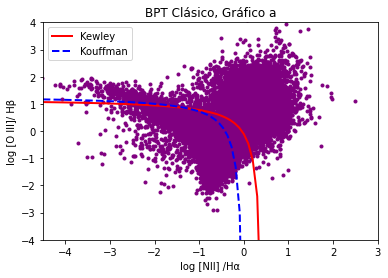

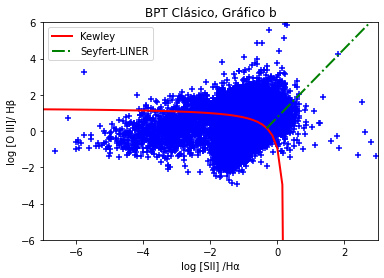

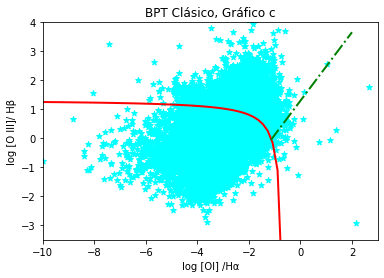

In [1]:
%run "C:\Users\Cristina Quiazúa M\Desktop\MyBPT\SDSS\With20MD\1.3 GrafConDataIgualesYCurv NoRepetidas.ipynb"

In [2]:
len(data)

20000

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
#Convertir pandas.core.frame.DataFrame a astropy.table.table.Table
astropy_table = Table.from_pandas(data)

In [5]:
type(astropy_table)

astropy.table.table.Table

In [6]:
data = astropy_table

## Razones

In [7]:
ejey_OHb=np.log((data['oiii_5007_flux'])/(data['h_beta_flux']))

ejex_NH=np.log((data['nii_6548_flux']+data['nii_6584_flux'])/data['h_alpha_flux'])
ejex_SH=np.log((data['sii_6717_flux']+data['sii_6731_flux'])/data['h_alpha_flux'])
ejex_OH=np.log((data['oi_6300_flux'])/(data['h_alpha_flux']))

In [8]:
# Ingresar las columnas de razones a la data.
data.add_column(ejey_OHb, name='Ejey_OHB')
data.add_column(ejex_NH, name='Ejex_NH')
data.add_column(ejex_SH, name='Ejex_SH')
data.add_column(ejex_OH, name='Ejex_OH')

In [9]:
data[1:5]

specobjid,ra,dec,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,nii_6584_flux,sii_6717_flux,sii_6731_flux,oi_6300_flux,class,subclass,Ejey_OHB,Ejex_NH,Ejex_SH,Ejex_OH
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes6,bytes11,float64,float64,float64,float64
299490502078654464,146.62857,-0.76513683,0.06465632,99.40005,25.64047,21.44437,17.10464,51.59155,35.33497,21.65778,8.490424,GALAXY,STARFORMING,-0.17870982255764298,-0.3694588775053708,-0.5562285499181298,-2.460213676497085
299491051834468352,146.63167,-0.98827781,0.05265425,127.3058,38.33226,35.46671,8.550285,25.78963,30.26996,25.72297,6.269853,GALAXY,STARFORMING,-0.07769732925993379,-1.310283685972076,-0.82136663342587,-3.010839156796902
299492700632147968,146.59272,-0.76025604,0.06502353,211.5018,53.18228,15.59901,25.31465,76.35482,41.6377,28.47964,7.211103,GALAXY,STARFORMING,-1.2265178074532048,-0.7325064477587709,-1.104063384723556,-3.378611587522619
299493250857723904,146.94999,-0.59220225,0.06477907,229.1325,60.80691,29.73346,24.49155,73.87218,45.46917,33.85824,7.237874,GALAXY,STARFORMING,-0.7154304228316234,-0.8456283002999179,-1.0607167204980377,-3.454972921982135


## 1.2 Para NII.

a. Infrarroja = Abajo de Kauffmann  
b. Compuesta = Arriba de Kauffmann y abajo de Kewley (Intermedias)   
c. LINER = Arriba de Kewley y abajo de Seyfert-LINER   
d. Seyfert = Arriba de Kewley y arrriba de Seyfert-LINER.       

aa. Etiquetado gráfico a  
bb. Etiquetado gráfico b  
cc. Etiquetado gráfico c  
dd. Etiquetado gráfico d   

### 1.2 Para NII. 
### a. Infrarroja = Abajo de Kauffmann 

In [10]:
# Convertir la tabla de datos en un DataFrame de Pandas
df = data.to_pandas()

In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
# Filtrar los datos que están por debajo de la línea de Kauffmann y tienen log [NII] /Hα <= 0
filtrados = df.query("Ejey_OHB <= (1.3 + (0.61 / (Ejex_NH - 0.05))) and Ejex_NH <= 0")

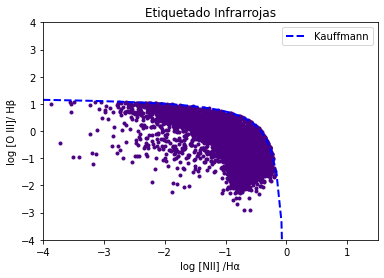

In [13]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(filtrados["Ejex_NH"], filtrados["Ejey_OHB"], marker=".", color="indigo")
ax.set_xlim(-4, 1.5)
ax.set_ylim(-4, 4)
plt.title('Etiquetado Infrarrojas')
plt.ylabel('log [O III]/ Hβ')
plt.xlabel('log [NII] /Hα')

# Kauffmann
x2 = np.linspace(-4, 0)
y2 = 1.3 + (0.61 / (x2 - 0.05))
plt.plot(x2, y2, '--', color='blue', lw=2, label='Kauffmann')

plt.legend()


## 1.2 Para NII.
## a. Infrarroja = Abajo de Kauffmann   
## aa. Etiquetado gráfico a

In [14]:
# Agregar una nueva columna "Infrarroja" al DataFrame con los valores "1" o "0"
df["Infrarroja"] = df.apply(lambda row: 1 if (row["Ejey_OHB"] <= (1.3 + (0.61 / (row["Ejex_NH"] - 0.05)))) and (row["Ejex_NH"] <= 0) else "0", axis=1)

In [15]:
df[10:15]

,specobjid,ra,dec,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,nii_6584_flux,sii_6717_flux,sii_6731_flux,oi_6300_flux,class,subclass,Ejey_OHB,Ejex_NH,Ejex_SH,Ejex_OH,Infrarroja
10,299504520851908608,146.57273,-1.060836,0.060614,144.65180,30.73027,10.572200,18.583320,56.05157,31.04092,17.307790,6.340064,b'GALAXY',b'STARFORMING',-1.067020,-0.661721,-1.095890,-3.127441,1
11,299506444527495168,146.86432,-0.464072,0.065152,451.12710,104.85060,15.129250,50.273740,151.63720,64.19861,42.085660,6.879756,b'GALAXY',b'STARFORMING',-1.935907,-0.803922,-1.445632,-4.183166,1
12,299506444997257216,146.90125,-0.413157,0.056548,131.25890,34.24051,46.406440,21.514970,64.89413,42.04194,28.548300,13.768800,b'GALAXY',b'STARFORMING',0.304029,-0.418079,-0.620280,-2.254767,0
13,299506719405402112,146.78847,-0.310658,0.056610,73.03383,13.08126,17.060640,4.734488,14.28031,16.53108,13.358920,4.534938,b'GALAXY',b'STARFORMING',0.265593,-1.345705,-0.893399,-2.779111,1
14,299506994283309056,146.77711,-0.241987,0.130728,53.77407,18.30871,9.870777,7.110305,21.44632,10.60184,9.946355,2.774125,b'GALAXY',b'STARFORMING',-0.617798,-0.632902,-0.962018,-2.964456,1


In [16]:
conteo_infrarrojas = df["Infrarroja"].value_counts()[1]
conteo_infrarrojas

9757

In [17]:
conteo_0 = df["Infrarroja"].value_counts()["0"]
conteo_0

10243

In [18]:
suma=16228+3772
suma

20000

## 1.2 Para NII.
## b. Compuesta = Arriba de Kauffmann y abajo de Kewley (Intermedias)   

In [19]:
# Kewley
x1 = np.linspace(-4, 0.4)
y1 = 1.19 + (0.61 / (x1 - 0.47))

# Kauffmann
x2 = np.linspace(-4, 0)
y2 = 1.3 + (0.61 / (x2 - 0.05))

In [20]:
# Filtrar los datos entre las curvas de Kauffmann y Kewley
interp_y1 = np.interp(df["Ejex_NH"], x1, y1) # Kew
interp_y2 = np.interp(df["Ejex_NH"], x2, y2) # Kauff

indices = np.where((df["Ejey_OHB"] < interp_y1) & (df["Ejey_OHB"] > interp_y2))
datos_entre_kauffmann_kewley = df.loc[indices]

Text(0.5, 0, 'log [NII] /Hα')

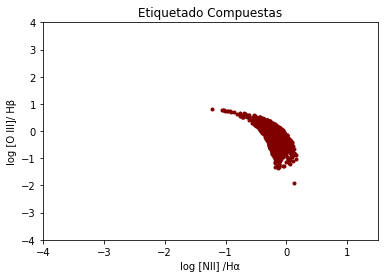

In [21]:
# Graficar los datos
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(datos_entre_kauffmann_kewley["Ejex_NH"], datos_entre_kauffmann_kewley["Ejey_OHB"], marker=".", color="maroon")

ax.set_xlim([-4, 1.5])
ax.set_ylim([-4, 4])

plt.title('Etiquetado Compuestas')
plt.ylabel('log [O III]/ Hβ')
plt.xlabel('log [NII] /Hα')

In [22]:
# La otra porcion: 

In [23]:
# Obtener los datos que están entre Kauffmann y Kewley
x1 = np.linspace(-4, 0.4)
y1 = 1.19 + (0.61 / (x1 - 0.47))

x2 = np.linspace(-4, 0)
y2 = 1.3 + (0.61 / (x2 - 0.05))

interp_y1 = np.interp(df["Ejex_NH"], x1, y1)
interp_y2 = np.interp(df["Ejex_NH"], x2, y2)

indices = np.where((df["Ejey_OHB"] < interp_y2) & (df["Ejey_OHB"] > interp_y1))

datos_entre_kauffmann_kewley = df.loc[indices]

Text(0.5, 0, 'log [NII] /Hα')

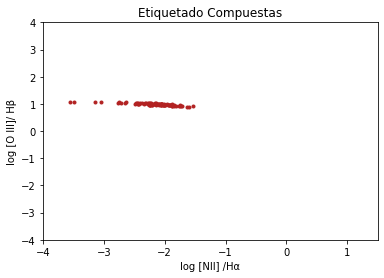

In [24]:
# Graficar los datos
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(datos_entre_kauffmann_kewley["Ejex_NH"], datos_entre_kauffmann_kewley["Ejey_OHB"], marker=".", color="firebrick")

ax.set_xlim([-4, 1.5])
ax.set_ylim([-4, 4])

plt.title('Etiquetado Compuestas')
plt.ylabel('log [O III]/ Hβ')
plt.xlabel('log [NII] /Hα')

In [25]:
# Ahora todo junto

In [26]:
# Kewley
x1 = np.linspace(-4, 0.4)
y1 = 1.19 + (0.61 / (x1 - 0.47))

# Kauffmann
x2 = np.linspace(-4, 0)
y2 = 1.3 + (0.61 / (x2 - 0.05))

In [27]:
# Filtrar los datos entre las curvas de Kauffmann y Kewley
interp_y1 = np.interp(df["Ejex_NH"], x1, y1)  # Kew
interp_y2 = np.interp(df["Ejex_NH"], x2, y2)  # Kauff

indices1 = np.where((df["Ejey_OHB"] < interp_y1) & (df["Ejey_OHB"] > interp_y2))
datos_entre_kauffmann_kewley1 = df.loc[indices1]

indices2 = np.where((df["Ejey_OHB"] < interp_y2) & (df["Ejey_OHB"] > interp_y1))
datos_entre_kauffmann_kewley2 = df.loc[indices2]

Text(0.5, 0, 'log [NII] /Hα')

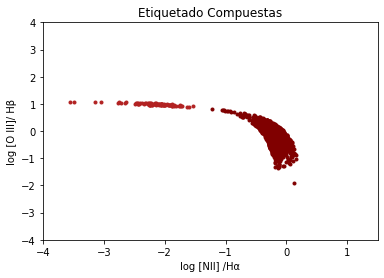

In [28]:
# Graficar los datos
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(datos_entre_kauffmann_kewley1["Ejex_NH"], datos_entre_kauffmann_kewley1["Ejey_OHB"], marker=".", color="maroon")
ax.scatter(datos_entre_kauffmann_kewley2["Ejex_NH"], datos_entre_kauffmann_kewley2["Ejey_OHB"], marker=".", color="firebrick")

ax.set_xlim([-4, 1.5])
ax.set_ylim([-4, 4])

# Agregar las líneas de Kauffmann y Kewley al mismo gráfico
# ax.plot(x1, y1, '-', color='red', lw=2, label='Kewley')
# ax.plot(x2, y2, '--', color='blue', lw=2, label='Kauffmann')

plt.title('Etiquetado Compuestas')
plt.ylabel('log [O III]/ Hβ')
plt.xlabel('log [NII] /Hα')
# plt.legend()

In [29]:
len(datos_entre_kauffmann_kewley1)

1005

In [30]:
len(datos_entre_kauffmann_kewley1)

1005

In [31]:
len(datos_entre_kauffmann_kewley2)

83

In [32]:
len(datos_entre_kauffmann_kewley2)

83

In [33]:
suma= 1256+72
suma

1328

## 1.2 Para NII.
## b. Compuesta = Arriba de Kauffmann y abajo de Kewley (Intermedias)   
## bb. Etiquetado gráfico b

In [34]:
# Crear la columna Etiqueta4 en df
df["Combinada"] = "0"

In [35]:
# Obtener los índices de los datos entre las curvas de Kauffmann y Kewley
indices1 = np.where((df["Ejey_OHB"] < interp_y1) & (df["Ejey_OHB"] > interp_y2))[0]
indices2 = np.where((df["Ejey_OHB"] < interp_y2) & (df["Ejey_OHB"] > interp_y1))[0]

In [36]:
# Asignar la etiqueta "Combinada" a los datos entre las curvas
df.loc[indices1, "Combinada"] = 1
df.loc[indices2, "Combinada"] = 1

In [37]:
df[0:5]

,specobjid,ra,dec,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,nii_6584_flux,sii_6717_flux,sii_6731_flux,oi_6300_flux,class,subclass,Ejey_OHB,Ejex_NH,Ejex_SH,Ejex_OH,Infrarroja,Combinada
0,299489677444933632,146.71421,-1.041304,0.021222,472.59040,119.49560,68.39606,74.302520,224.11360,124.71150,84.18053,18.594930,b'GALAXY',b'STARFORMING',-0.557964,-0.459740,-0.816412,-3.235340,1,0
1,299490502078654464,146.62857,-0.765137,0.064656,99.40005,25.64047,21.44437,17.104640,51.59155,35.33497,21.65778,8.490424,b'GALAXY',b'STARFORMING',-0.178710,-0.369459,-0.556229,-2.460214,1,0
2,299491051834468352,146.63167,-0.988278,0.052654,127.30580,38.33226,35.46671,8.550285,25.78963,30.26996,25.72297,6.269853,b'GALAXY',b'STARFORMING',-0.077697,-1.310284,-0.821367,-3.010839,1,0
3,299492700632147968,146.59272,-0.760256,0.065024,211.50180,53.18228,15.59901,25.314650,76.35482,41.63770,28.47964,7.211103,b'GALAXY',b'STARFORMING',-1.226518,-0.732506,-1.104063,-3.378612,1,0
4,299493250857723904,146.94999,-0.592202,0.064779,229.13250,60.80691,29.73346,24.491550,73.87218,45.46917,33.85824,7.237874,b'GALAXY',b'STARFORMING',-0.715430,-0.845628,-1.060717,-3.454973,1,0


In [38]:
count_combinada = df["Combinada"].value_counts()[1]
count_combinada

1088

## 1.2 Para NII.
## c. LINER = Arriba de Kewley y abajo de Seyfert-LINER

Gráfica general AGNs:

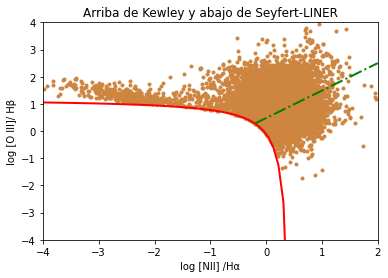

In [39]:
indices = np.where((df["Ejey_OHB"] > interp_y1) & (df["Ejey_OHB"] > interp_y2))
datos_entre_kauffmann_kewley = df.loc[indices]

# Graficar los datos
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(datos_entre_kauffmann_kewley["Ejex_NH"], datos_entre_kauffmann_kewley["Ejey_OHB"], marker=".", color="peru")

ax.set_xlim([-4, 2])
ax.set_ylim([-4, 4])

plt.title('Arriba de Kewley y abajo de Seyfert-LINER')
plt.ylabel('log [O III]/ Hβ')
plt.xlabel('log [NII] /Hα')

ax.plot(x1, y1, '-', color='red', lw=2, label='Kewley')

# Seyfert-LINER
x3 = np.linspace(-0.2, 2)
y3 = 1.01 * x3 + 0.48
ax.plot(x3, y3, '-.', color='green', lw=2, label='Seyfert-LINER')

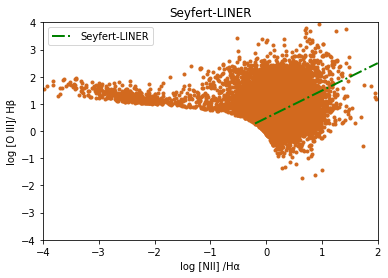

In [40]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(datos_entre_kauffmann_kewley["Ejex_NH"], datos_entre_kauffmann_kewley["Ejey_OHB"], marker=".", color="chocolate")

ax.set_xlim([-4, 2])
ax.set_ylim([-4, 4])

# Línea Seyfert-LINER
x3 = np.linspace(-0.2, 2)
y3 = 1.01 * x3 + 0.48
ax.plot(x3, y3, '-.', color='green', lw=2, label='Seyfert-LINER')

plt.title('Seyfert-LINER')
plt.ylabel('log [O III]/ Hβ')
plt.xlabel('log [NII] /Hα')
plt.legend()

### Abajo de Seyfert-LINER y arriba de Kewley = LINER

In [41]:
interp_y3 = np.interp(df["Ejex_NH"], x3, y3)

In [42]:
# Obtener los datos por debajo de la curva Seyfert-LINER pero por encima de la curva Kewley
indices = np.where((df["Ejey_OHB"] < interp_y3) & (df["Ejey_OHB"] > interp_y1))
datos_entre_seyfert_kewley = df.loc[indices]

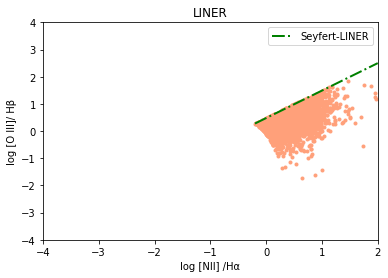

In [43]:
# Graficar los datos por debajo de la curva Seyfert-LINER pero por encima de la curva Kewley
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(datos_entre_seyfert_kewley["Ejex_NH"], datos_entre_seyfert_kewley["Ejey_OHB"], marker=".", color="lightsalmon")

ax.set_xlim([-4, 2])
ax.set_ylim([-4, 4])

ax.plot(x3, y3, '-.', color='green', lw=2, label='Seyfert-LINER')

plt.title('LINER')
plt.ylabel('log [O III]/ Hβ')
plt.xlabel('log [NII] /Hα')
plt.legend()

## 1.2 Para NII.
## c. LINER = Arriba de Kewley y abajo de Seyfert-LINER
## cc. Etiquetado gráfico c

In [44]:
# Crear la columna Etiqueta3 en df y asignar "0" a todos los valores
df["LINER"] = "0"

In [45]:
# Obtener los índices de los datos encima de la línea Kewley y debajo de la línea Seyfert-LINER
indices3 = np.where((df["Ejey_OHB"] < interp_y3) & (df["Ejey_OHB"] > interp_y1))

In [46]:
# Asignar la etiqueta "LINER" a los datos que cumplen la condición
df.loc[indices3[0], "LINER"] = 1

In [47]:
df[10012:10017]

,specobjid,ra,dec,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,nii_6584_flux,sii_6717_flux,...,oi_6300_flux,class,subclass,Ejey_OHB,Ejex_NH,Ejex_SH,Ejex_OH,Infrarroja,Combinada,LINER
10012,300622998686164992,149.19127,-0.259534,0.070619,197.92530,56.444210,128.89820,51.04168,153.95350,29.529620,...,7.942978,b'GALAXY',b'AGN',0.825770,0.035097,-1.136265,-3.215601,0,0,0
10013,300623823319885824,149.15457,-0.115721,0.166888,130.37410,24.969070,46.54971,26.10609,78.74199,38.783490,...,13.159350,b'GALAXY',b'AGN',0.622883,-0.217896,-0.644756,-2.293275,0,0,0
10014,300624922831513600,149.14242,-0.372419,0.091934,26.00757,6.096581,15.64266,10.79015,32.54558,8.862059,...,8.864543,b'GALAXY',b'AGN',0.942274,0.510590,-0.374265,-1.076328,0,0,1
10015,300638391848953856,148.35708,-1.061524,0.083621,203.12730,56.252740,255.69100,91.89747,277.18400,81.418870,...,38.126240,b'GALAXY',b'AGN',1.514115,0.597185,-0.316222,-1.672930,0,0,0
10016,300638941604767744,148.39456,-0.887712,0.137280,96.90291,17.370770,98.33616,33.08525,99.79275,24.222840,...,6.459654,b'GALAXY',b'AGN',1.733603,0.315722,-0.817957,-2.708134,0,0,0


In [48]:
contador_liner = df["LINER"].value_counts()[1]
contador_liner

3777

## 1.2 Para NII.
## d. Seyfert = Arriba de Kewley y arrriba de Seyfert-LINER.

In [49]:
# Arriba de Seyfert-LINER y Kewley

In [50]:
interp_y4 = np.interp(df["Ejex_NH"], x3, y3)

In [51]:
# Obtener los datos por debajo de la curva Seyfert-LINER pero por encima de la curva Kewley
indices = np.where((df["Ejey_OHB"] > interp_y4) & (df["Ejey_OHB"] > interp_y1))
datos_entre_seyfert_kewley = df.loc[indices]

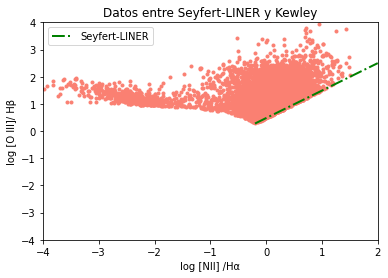

In [52]:
# Graficar los datos por encima de la curva Seyfert-LINER y encima de la curva Kewley
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(datos_entre_seyfert_kewley["Ejex_NH"], datos_entre_seyfert_kewley["Ejey_OHB"], marker=".", color="salmon")

ax.set_xlim([-4, 2])
ax.set_ylim([-4, 4])

ax.plot(x3, y3, '-.', color='green', lw=2, label='Seyfert-LINER')

plt.title('Datos entre Seyfert-LINER y Kewley')
plt.ylabel('log [O III]/ Hβ')
plt.xlabel('log [NII] /Hα')
plt.legend()

## 1.2 Para NII.
## d. Seyfert = Arriba de Kewley y arrriba de Seyfert-LINER.
## dd. Etiquetado gráfico d

In [53]:
# Crear la columna Etiqueta4 en df
df["Seyfert"] = "0"

In [54]:
# Obtener los índices de los datos que están encima de la curva Seyfert-LINER y encima de la curva Kewley
indices4 = np.where((df["Ejey_OHB"] > interp_y4) & (df["Ejey_OHB"] > interp_y1))

In [55]:
# Asignar la etiqueta "Seyfert" a los datos correspondientes en la columna Etiqueta4
df.loc[indices4[0], "Seyfert"] = 1

In [56]:
df[0:5]

,specobjid,ra,dec,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,nii_6584_flux,sii_6717_flux,...,class,subclass,Ejey_OHB,Ejex_NH,Ejex_SH,Ejex_OH,Infrarroja,Combinada,LINER,Seyfert
0,299489677444933632,146.71421,-1.041304,0.021222,472.59040,119.49560,68.39606,74.302520,224.11360,124.71150,...,b'GALAXY',b'STARFORMING',-0.557964,-0.459740,-0.816412,-3.235340,1,0,0,0
1,299490502078654464,146.62857,-0.765137,0.064656,99.40005,25.64047,21.44437,17.104640,51.59155,35.33497,...,b'GALAXY',b'STARFORMING',-0.178710,-0.369459,-0.556229,-2.460214,1,0,0,0
2,299491051834468352,146.63167,-0.988278,0.052654,127.30580,38.33226,35.46671,8.550285,25.78963,30.26996,...,b'GALAXY',b'STARFORMING',-0.077697,-1.310284,-0.821367,-3.010839,1,0,0,0
3,299492700632147968,146.59272,-0.760256,0.065024,211.50180,53.18228,15.59901,25.314650,76.35482,41.63770,...,b'GALAXY',b'STARFORMING',-1.226518,-0.732506,-1.104063,-3.378612,1,0,0,0
4,299493250857723904,146.94999,-0.592202,0.064779,229.13250,60.80691,29.73346,24.491550,73.87218,45.46917,...,b'GALAXY',b'STARFORMING',-0.715430,-0.845628,-1.060717,-3.454973,1,0,0,0


# 1.3 Etiquetas MANERA DEDUCTIVA.

1.3.1 Comprobación de cantidades.  
1.3.2 Solucion de cantidades.  
1.3.3 Matriz NII Deductiva.  
1.3.4 Graficas de NII Deductiva.  

### 1.3.1 Comprobación de cantidades: 

In [57]:
contador_Seyfert = df["Seyfert"].value_counts()[1]
contador_Seyfert

5555

In [58]:
type(df)

pandas.core.frame.DataFrame

In [59]:
conteo_infrarrojas = df["Infrarroja"].value_counts()[1]
conteo_infrarrojas

9757

In [60]:
count_combinada = df["Combinada"].value_counts()[1]
count_combinada

1088

In [61]:
contador_LINER = df["LINER"].value_counts()[1]
contador_LINER

3777

In [62]:
contador_Seyfert = df["Seyfert"].value_counts()[1]
contador_Seyfert

5555

In [63]:
Suma= 16228+1328+918+1686
Suma

20160

In [64]:
# Son solo 20.000 hay unas repetidas

## Hay una parte que se debe anexar, espacio que queda entre arriba de Kauffman, abajo de Kewley, asi que se llamaran "Combinado"

### 1.3.2 Solucion de cantidades.

In [65]:
# Crear la columna "Sumas" que muestra la suma de los valores en las columnas "Infrarroja", "Combinada", "LINER" y "Seyfert"
df["Sumas"] = df[["Infrarroja", "Combinada", "LINER", "Seyfert"]].astype(int).sum(axis=1)

In [66]:
df

,specobjid,ra,dec,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,nii_6584_flux,sii_6717_flux,...,subclass,Ejey_OHB,Ejex_NH,Ejex_SH,Ejex_OH,Infrarroja,Combinada,LINER,Seyfert,Sumas
0,299489677444933632,146.71421,-1.041304,0.021222,472.59040,119.495600,68.39606,74.302520,224.11360,124.71150,...,b'STARFORMING',-0.557964,-0.459740,-0.816412,-3.235340,1,0,0,0,1
1,299490502078654464,146.62857,-0.765137,0.064656,99.40005,25.640470,21.44437,17.104640,51.59155,35.33497,...,b'STARFORMING',-0.178710,-0.369459,-0.556229,-2.460214,1,0,0,0,1
2,299491051834468352,146.63167,-0.988278,0.052654,127.30580,38.332260,35.46671,8.550285,25.78963,30.26996,...,b'STARFORMING',-0.077697,-1.310284,-0.821367,-3.010839,1,0,0,0,1
3,299492700632147968,146.59272,-0.760256,0.065024,211.50180,53.182280,15.59901,25.314650,76.35482,41.63770,...,b'STARFORMING',-1.226518,-0.732506,-1.104063,-3.378612,1,0,0,0,1
4,299493250857723904,146.94999,-0.592202,0.064779,229.13250,60.806910,29.73346,24.491550,73.87218,45.46917,...,b'STARFORMING',-0.715430,-0.845628,-1.060717,-3.454973,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1521216989912131584,223.85369,38.562627,0.088771,77.65020,7.501386,30.29424,29.649020,89.42828,24.70292,...,b'BROADLINE',1.395870,0.427559,-0.187666,-2.305909,0,0,0,1,1
19996,1521220288447014912,223.94500,38.035841,0.161917,95.93267,10.091370,36.14597,40.013390,120.68960,54.47434,...,b'BROADLINE',1.275885,0.515911,-0.027577,-1.196662,0,0,0,1,1
19997,1521236506243524608,224.30721,38.740761,0.073296,74.63956,23.419480,46.87015,35.989930,108.55390,48.64569,...,b'BROADLINE',0.693813,0.660912,0.208858,-1.292817,0,0,1,0,1
19998,1521237605755152384,224.21446,38.756460,0.028904,177.74620,58.202110,109.28750,99.974900,301.54740,117.41410,...,b'BROADLINE',0.630060,0.814906,-0.047479,-3.318873,0,0,1,0,1


In [67]:
suma_total = df["Sumas"].sum()
print("La suma total de la columna 'Sumas' es:", suma_total)

La suma total de la columna 'Sumas' es: 20177


In [68]:
# filas donde el valor sea = o superior a 2
filas_superior_2 = df[df["Sumas"] >= 2]

In [69]:
filas_superior_2

,specobjid,ra,dec,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,nii_6584_flux,sii_6717_flux,...,subclass,Ejey_OHB,Ejex_NH,Ejex_SH,Ejex_OH,Infrarroja,Combinada,LINER,Seyfert,Sumas
207,300727452290803712,147.72594,1.192665,0.028337,4.035322e+02,133.77640,352.655700,11.002880,33.18724,65.234860,...,b'STARFORMING',0.969322,-2.211755,-1.320015,-3.241421,1,1,0,1,3
1383,310789912880244736,163.52566,-0.044286,0.135286,9.250813e+01,14.74873,7.961335,17.549260,52.93261,20.692320,...,b'STARFORMING',-0.616560,-0.271941,-0.973188,-3.286454,1,1,0,0,2
1787,314157162190366720,169.63577,-0.152042,0.097856,1.045722e+02,27.77366,15.158890,19.844570,59.85580,32.177040,...,b'STARFORMING',-0.605501,-0.271604,-0.671438,-2.811680,1,1,0,0,2
2815,322156115842328576,182.00630,0.469697,0.034973,2.803943e+02,91.11095,240.079600,7.343616,22.15004,45.912350,...,b'STARFORMING',0.968893,-2.252022,-1.309222,-3.178699,1,1,0,1,3
3710,330033017059829760,195.12660,1.046537,0.067570,2.410518e+02,52.68264,66.056080,35.710270,107.71040,28.416120,...,b'STARFORMING',0.226218,-0.519230,-1.576543,-3.726263,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17483,761264779095468032,343.81195,1.211880,0.072458,9.488226e+07,51.25505,169.895500,72.017110,217.22020,112.554000,...,b'BROADLINE',1.198369,-12.700900,-13.095093,-14.460378,1,0,0,1,2
17727,840020324098533376,350.99023,14.730834,0.041103,1.335306e+02,66.83922,36.419750,25.286680,76.27047,5.855269,...,b'BROADLINE',-0.607179,-0.273709,-2.692985,-4.318307,1,1,0,0,2
18614,1050632058054928384,131.03443,34.717239,0.014070,6.691610e+01,13.38748,7.129671,12.727150,38.38803,9.410910,...,b'BROADLINE',-0.630055,-0.269358,-1.337840,-2.733992,1,1,0,0,2
19084,1169939241241700352,195.17100,55.217997,0.064816,1.343171e+02,13.85898,38.197520,3.412384,10.29254,7.603853,...,b'BROADLINE',1.013837,-2.282448,-2.311854,-3.948551,1,1,0,1,3


In [70]:
len(filas_superior_2)

94

In [71]:
# Obtener la lista de columnas que se deben evaluar
columnas_evaluar = ["Infrarroja", "Combinada", "LINER", "Seyfert"]

In [72]:
# Crear la columna "PreEtiqueta" con los valores correspondientes, si no es 1, entonces: es combinada.
def obtener_pre_etiqueta(row):
    etiquetas = []
    for etiqueta in columnas_evaluar:
        if row[etiqueta] == 1:
            etiquetas.append(etiqueta)
    if len(etiquetas) == 1:
        return etiquetas[0]
    else:
        return "Combinada"

In [73]:
df["PreEtiquetaNII"] = df.apply(obtener_pre_etiqueta, axis=1)

### 1.3.3 Matriz NII Deductiva.

In [74]:
df[0:10]

,specobjid,ra,dec,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,nii_6584_flux,sii_6717_flux,...,Ejey_OHB,Ejex_NH,Ejex_SH,Ejex_OH,Infrarroja,Combinada,LINER,Seyfert,Sumas,PreEtiquetaNII
0,299489677444933632,146.71421,-1.041304,0.021222,472.59040,119.49560,68.39606,74.302520,224.11360,124.71150,...,-0.557964,-0.459740,-0.816412,-3.235340,1,0,0,0,1,Infrarroja
1,299490502078654464,146.62857,-0.765137,0.064656,99.40005,25.64047,21.44437,17.104640,51.59155,35.33497,...,-0.178710,-0.369459,-0.556229,-2.460214,1,0,0,0,1,Infrarroja
2,299491051834468352,146.63167,-0.988278,0.052654,127.30580,38.33226,35.46671,8.550285,25.78963,30.26996,...,-0.077697,-1.310284,-0.821367,-3.010839,1,0,0,0,1,Infrarroja
3,299492700632147968,146.59272,-0.760256,0.065024,211.50180,53.18228,15.59901,25.314650,76.35482,41.63770,...,-1.226518,-0.732506,-1.104063,-3.378612,1,0,0,0,1,Infrarroja
4,299493250857723904,146.94999,-0.592202,0.064779,229.13250,60.80691,29.73346,24.491550,73.87218,45.46917,...,-0.715430,-0.845628,-1.060717,-3.454973,1,0,0,0,1,Infrarroja
5,299496274514700288,146.95607,-0.342300,0.134680,77.04804,22.93367,20.20715,19.518040,58.87090,36.77939,...,-0.126570,0.017254,-0.041851,-1.819342,0,0,1,0,1,LINER
6,299496824270514176,147.17639,-0.354057,0.006283,129.30380,47.89519,62.74385,4.237359,12.78085,23.64687,...,0.270045,-2.027881,-1.185132,-4.847947,1,0,0,0,1,Infrarroja
7,299498473068193792,147.32951,0.028903,0.048096,493.31230,108.99000,56.12985,104.337700,314.70670,86.07532,...,-0.663588,-0.163166,-1.176673,-3.149075,0,1,0,0,1,Combinada
8,299500672561211392,146.57134,-0.957211,0.065183,351.30450,66.98206,18.08399,49.037670,147.90900,48.68991,...,-1.309398,-0.578720,-1.411553,-3.877328,1,0,0,0,1,Infrarroja
9,299503421340280832,146.51283,-0.845765,0.064902,1151.21100,257.94090,95.84792,186.808800,563.45860,194.40220,...,-0.989968,-0.428140,-1.196129,-3.581030,1,0,0,0,1,Infrarroja


In [75]:
conteo_infrarroja = df["PreEtiquetaNII"].value_counts()["Infrarroja"]
conteo_infrarroja

9663

In [76]:
conteo_combinada = df["PreEtiquetaNII"].value_counts()["Combinada"]
conteo_combinada

1089

In [77]:
conteo_Liner = df["PreEtiquetaNII"].value_counts()["LINER"]
conteo_Liner

3777

In [78]:
conteo_seyfert = df["PreEtiquetaNII"].value_counts()["Seyfert"]
conteo_seyfert

5471

In [79]:
sumat= 16140+1328+918+1614
sumat

20000

## Ahora si estan correctamente etiquetadas las 20.000!

### 1.3.4 Graficas de NII Deductiva.

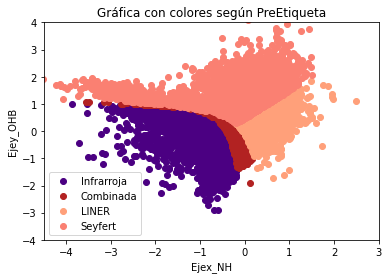

In [80]:
import matplotlib.pyplot as plt

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Configurar los colores según la columna "PreEtiqueta"
colores = {
    "Infrarroja": "indigo",
    "Combinada": "firebrick",
    "LINER": "lightsalmon",
    "Seyfert": "salmon"
}

# Filtrar los datos por etiqueta
datos_infrarroja = df[df["PreEtiquetaNII"] == "Infrarroja"]
datos_combinada = df[df["PreEtiquetaNII"] == "Combinada"]
datos_liner = df[df["PreEtiquetaNII"] == "LINER"]
datos_seyfert = df[df["PreEtiquetaNII"] == "Seyfert"]

# Graficar los puntos con colores según la etiqueta
ax.scatter(datos_infrarroja["Ejex_NH"], datos_infrarroja["Ejey_OHB"], color="indigo", label="Infrarroja")
ax.scatter(datos_combinada["Ejex_NH"], datos_combinada["Ejey_OHB"], color="firebrick", label="Combinada")
ax.scatter(datos_liner["Ejex_NH"], datos_liner["Ejey_OHB"], color="lightsalmon", label="LINER")
ax.scatter(datos_seyfert["Ejex_NH"], datos_seyfert["Ejey_OHB"], color="salmon", label="Seyfert")

# Configurar los límites de los ejes
ax.set_xlim([-4.5, 3])
ax.set_ylim([-4, 4])

# Agregar etiquetas y título
plt.xlabel("Ejex_NH")
plt.ylabel("Ejey_OHB")
plt.title("Gráfica con colores según PreEtiqueta")
plt.legend()

In [81]:
df1=df

In [82]:
df1[0:3]

,specobjid,ra,dec,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,nii_6584_flux,sii_6717_flux,...,Ejey_OHB,Ejex_NH,Ejex_SH,Ejex_OH,Infrarroja,Combinada,LINER,Seyfert,Sumas,PreEtiquetaNII
0,299489677444933632,146.71421,-1.041304,0.021222,472.59040,119.49560,68.39606,74.302520,224.11360,124.71150,...,-0.557964,-0.459740,-0.816412,-3.235340,1,0,0,0,1,Infrarroja
1,299490502078654464,146.62857,-0.765137,0.064656,99.40005,25.64047,21.44437,17.104640,51.59155,35.33497,...,-0.178710,-0.369459,-0.556229,-2.460214,1,0,0,0,1,Infrarroja
2,299491051834468352,146.63167,-0.988278,0.052654,127.30580,38.33226,35.46671,8.550285,25.78963,30.26996,...,-0.077697,-1.310284,-0.821367,-3.010839,1,0,0,0,1,Infrarroja
